In [12]:
import pandas as pd
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from os.path import join
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [13]:
with open(join('data', 'credit.pkl'), 'rb') as f:
    X_train, y_train, X_test, y_test = pickle.load(f)

X_train.shape, X_test.shape

((1500, 3), (500, 3))

In [14]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore.fit(X_train, y_train);

In [15]:
previsoes = arvore.predict(X_test)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [16]:
accuracy_score(y_test, previsoes)

0.982

[[430   6]
 [  3  61]]


0.982

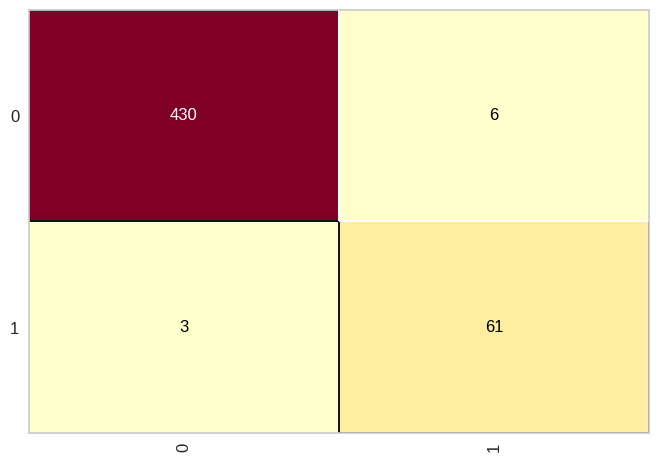

In [17]:
from yellowbrick.classifier import ConfusionMatrix

print(confusion_matrix(y_test, previsoes))

cm = ConfusionMatrix(arvore)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [18]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



In [20]:
arvore.classes_

array([0, 1])

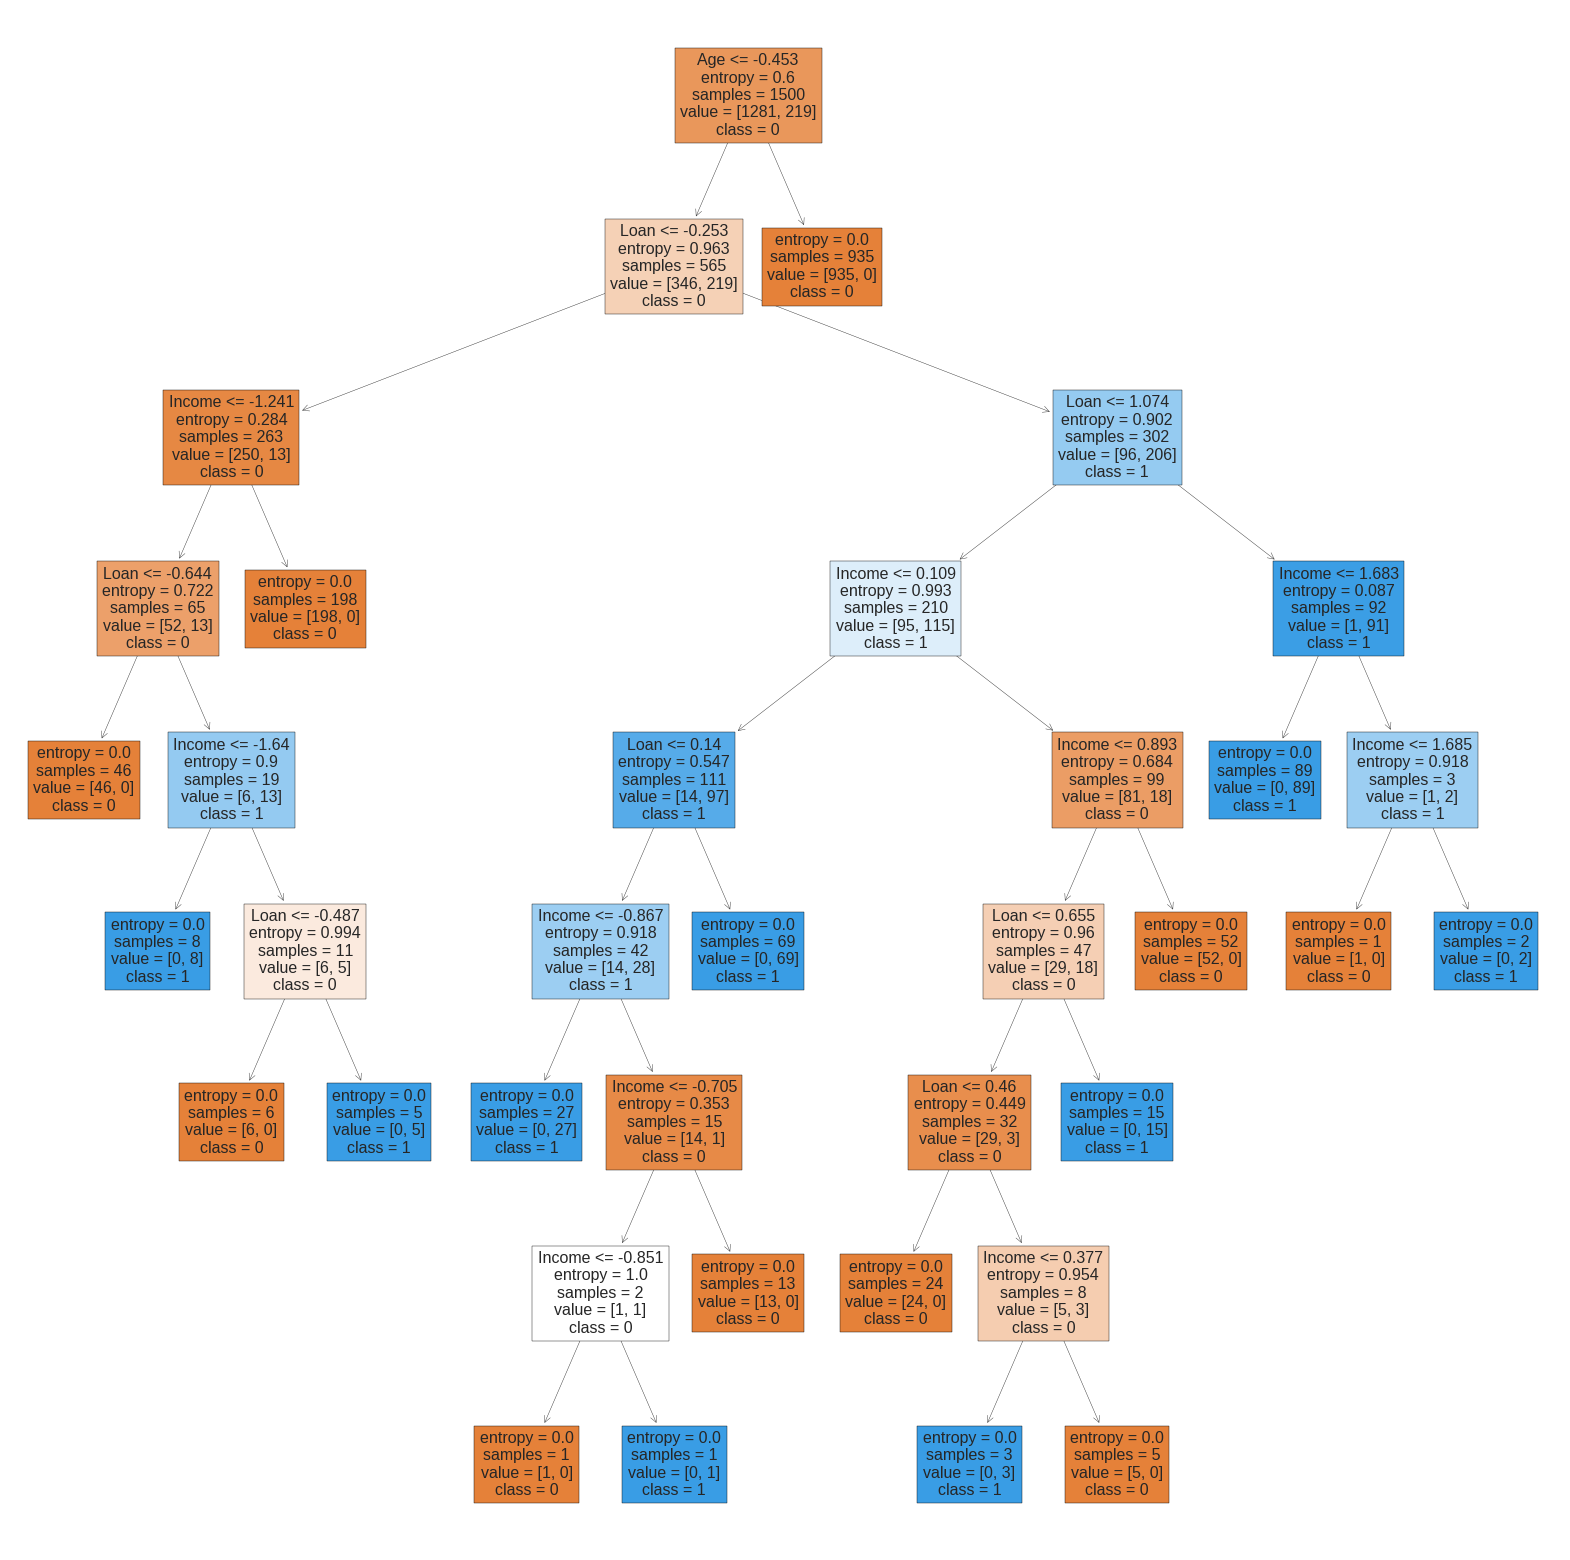

In [23]:
from sklearn import tree
import matplotlib.pyplot as plt

previsores = ['Income', 'Age', 'Loan']
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
tree.plot_tree(arvore, feature_names=previsores, class_names=(['0','1']), filled=True);
fig.savefig(join('source', 'arvore_credit.png'))